# 1. Importing Modules

In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

# 2. Data Preparation

### 2.1 Setting Labels for each pokemon

In [2]:
poke_to_label={'Charmander': 0, 'Eevee': 1, 'Pikachu': 2, 'Psyduck': 3, 'Vulpix': 4}

In [3]:
label_to_poke = {0:'Charmander',1:'Eevee',2:'Pikachu',3:'Psyduck',4:'Vulpix'}

### 2.2 Setting Image Data

In [4]:
# Making list for the whole image data and label
Image_data=[]
Label=[]

p = Path("./Dataset/")
dir = p.glob("*")

for folder_d in dir:
    cur_label = str(folder_d).split('\\')[-1]
    print("Current Folder: ", cur_label)
    
    #Get count of the no of images of each pokemon
    cnt=0
    
    #Iterate in a folder and pick all images and store the count
    # *.jpg selects all the jpg files from the folder_d folder
    for img_path in folder_d.glob("*.jpg"):
        
        # 1. load image and resize the images to make them all of same size
        loaded_image = image.load_img(img_path,target_size=(40,40))
        
        # 2. Converting image to array
        image_array = image.img_to_array(loaded_image)

        # 3. Append the image array to Image data
        Image_data.append(image_array)
        
        # 4. Append the label as well along with the image data
        Label.append(poke_to_label[cur_label])
        
        #5. Increment count by 1
        cnt+=1
    print("Count of Images: ", cnt)
    print()
        

Current Folder:  Charmander
Count of Images:  200

Current Folder:  Eevee
Count of Images:  41

Current Folder:  Pikachu
Count of Images:  199

Current Folder:  Psyduck
Count of Images:  158

Current Folder:  Vulpix
Count of Images:  67



In [5]:
print(len(Image_data))
print(len(Label))

665
665


In [6]:
import numpy as np

In [7]:
import random
random.seed(0)

In [8]:
X_data = np.array(Image_data)
Y_data = np.array(Label)

# Shuffle Data
from sklearn.utils import shuffle
X_data,Y_data= shuffle(X_data,Y_data,random_state=2)

#normalize the data
X_data = X_data/255.0

In [9]:
X_data.shape
# no of images , height , width , no of color channels(RGB)

(665, 40, 40, 3)

In [10]:
Y_data.shape

(665,)

In [11]:
print(Y_data)

[0 2 4 0 3 2 0 0 3 3 2 3 3 0 1 0 0 2 0 4 2 3 3 0 2 0 2 0 3 3 0 3 4 3 1 0 2
 3 2 2 3 2 4 3 2 0 0 0 0 0 1 4 2 2 2 3 0 0 1 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2
 1 0 3 2 4 0 0 2 2 0 3 3 0 0 2 2 1 2 0 4 1 2 0 3 1 3 0 4 0 2 0 4 3 0 3 3 3
 2 0 0 0 0 0 1 2 3 4 2 2 1 2 2 0 0 2 0 0 2 3 0 1 3 2 2 2 2 4 3 0 2 0 1 2 2
 3 3 1 2 0 4 2 0 2 0 1 3 3 1 3 2 3 2 0 0 0 2 2 2 3 3 1 3 0 0 0 2 0 3 2 2 4
 3 0 3 0 4 4 0 2 0 0 4 2 3 3 0 0 0 0 2 3 2 0 0 3 3 2 2 3 3 0 2 1 2 3 0 0 2
 2 4 0 0 2 2 2 0 0 3 0 2 3 4 0 0 4 3 3 0 3 1 0 0 2 2 4 0 2 0 3 2 1 2 0 4 2
 0 2 4 0 4 4 3 2 2 2 2 3 3 2 0 0 0 1 2 3 4 3 2 2 3 3 3 0 0 1 3 0 3 0 2 2 4
 4 3 3 0 4 3 0 3 1 0 3 0 3 0 0 0 2 3 2 3 0 0 0 3 0 0 4 4 1 2 3 1 0 2 3 0 3
 0 2 2 0 1 2 0 0 2 1 3 4 3 2 2 0 3 4 3 2 0 0 3 0 2 4 0 2 2 0 4 3 3 2 2 2 2
 2 0 0 3 4 2 0 3 2 3 3 2 0 4 3 0 1 2 2 3 2 3 4 1 4 4 2 3 4 0 0 2 2 2 2 0 4
 3 0 2 2 0 3 2 3 0 3 2 0 3 0 3 0 1 2 0 3 2 2 0 0 3 2 3 2 0 2 2 2 0 0 0 0 4
 4 2 2 2 0 3 0 3 1 0 0 2 2 3 0 2 3 2 2 2 2 1 2 4 2 3 0 4 0 3 2 0 3 0 2 0 3
 2 1 0 3 3 0 0 4 3 2 2 2 

# 3. Visualization

In [12]:
def draw_image(img,l):
    plt.title(label_to_poke[l])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

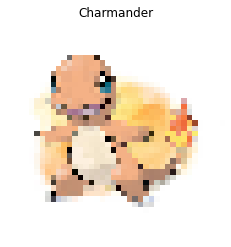

In [13]:
draw_image(X_data[0],Y_data[0])

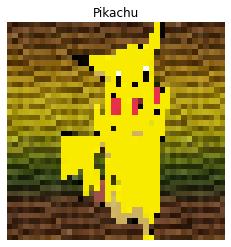

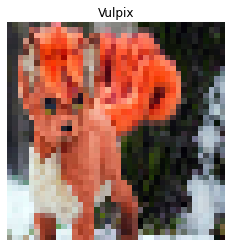

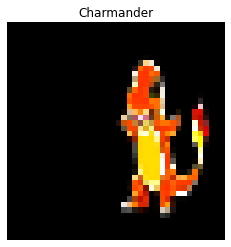

In [14]:
for i in range(1,4):
    draw_image(X_data[i],Y_data[i])

# 4. Create Training and Testing Data

In [15]:
split = int(X_data.shape[0]*0.8)
x_train = X_data[:split,:]
y_train = Y_data[:split]
x_test=X_data[split:,:]
y_test=Y_data[split:]

In [16]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(532, 40, 40, 3) (133, 40, 40, 3)
(532,) (133,)


# 5. Building Neural Network

In [17]:
class Neural_Network:
    
    #1. Neural Network Architecture
    def __init__(self,isize,layers,osize):
        np.random.seed(0)
        
        model={}
        model['w1']=np.random.randn(isize,layers[0]) # matrix for first hidden layer
        model['w2']=np.random.randn(model['w1'].shape[1],layers[1]) #matrix for second hidden layer
        model['w3']=np.random.randn(model['w2'].shape[1],osize) #matrix for output layer
        
        model['b1']=np.zeros((1,layers[0])) #bias for first hidden layer
        model['b2']=np.zeros((1,layers[1])) #bias for second hidden layer
        model['b3']=np.zeros((1,osize)) #bias for output layer
        
        self.model=model
    
    #2. Forward Propagation - Passing data to the neural network created
    def For_prop(self,inp_x):
        
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        #First Hidden Layer
        z1 = np.dot(inp_x,w1) + b1
        a1 = np.tanh(z1) #Transforms value in range -1 to 1
        
        #Second Hidden Layer
        z2=np.dot(a1,w2) + b2
        a2= np.tanh(z2)
        
        #Output Layer
        z3=np.dot(a2,w3) + b3
        y_hat = cal_soft(z3) #Softmax Function : defined later
        
        #Store outputs
        self.outputs=(a1,a2,y_hat)
        return y_hat
    
    #3. Back Propagation
    def back_prop(self,x,y,lr=0.001):
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_hat = self.outputs
        
        m=x.shape[0] #input is of mxn size m data points(no of inp layer neurons) and n features for each m
        
        #Compute values for final output layer first        
        delta3 = y_hat-y
        delta3_w = np.dot(a2.T,delta3)
        delta3_b = np.sum(delta3,axis=0)
        
        #second hidden layer
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        delta2_w = np.dot(a1.T,delta2)
        delta2_b = np.sum(delta2,axis=0)
        
        #first hidden layer
        delta1 = (1-np.square(a1))*np.dot(delta2,w2.T)
        delta1_w = np.dot(x.T,delta1)
        delta1_b = np.sum(delta1,axis=0)
        
        #Update Values using Gradient descent
        self.model['w1'] -= lr*delta1_w
        self.model['b1'] -= lr*delta1_b
        self.model['w2'] -= lr*delta2_w
        self.model['b2'] -= lr*delta2_b
        self.model['w3'] -= lr*delta3_w
        self.model['b3'] -= lr*delta3_b
    
    #4. Predict Function
    def predict(self,x):
        y_hat=self.For_prop(x)
        return np.argmax(y_hat,axis=1)
    
    #5. A function which provides details about model created
    def print_info(self):
        
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_hat = self.outputs
        
        print("W1: ",w1.shape)
        print("A1: ",a1.shape)
        print("W2: ",w2.shape)
        print("A2: ",a2.shape)
        print("W3: ",w3.shape)
        print("Y_hat: ",y_hat.shape)
#Softmax Function
def cal_soft(a):
    num=np.exp(a)
    den=np.sum(num,axis=1,keepdims=True)
    return (num/den)
# Loss Function
def cal_loss(y_hat,p):
    l=(-1)*np.mean(y_hat*np.log(p))
    return l
# One hot Encoding
def one_hot_encoding(output_matrix,depth):
    m=output_matrix.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),output_matrix]=1
    
    return y_hot
# Create a training function
def train_nnwk(x,y,epochs,lr,logs=True):
    losses=[]
    class_no = len(np.unique(y))
    y_data_onehot=one_hot_encoding(y,class_no)
    for i in range(epochs):
        y_hat=my_model.For_prop(x)
        l=cal_loss(y_data_onehot,y_hat)
        my_model.back_prop(x,y_data_onehot,lr)
        
        if(logs):
            if(i%100==0):
                print("Loss at epoch ",i," is: ",l)
            losses.append(l)
    return losses

In [18]:
my_model = Neural_Network(isize=4800,layers=[100,50],osize=5) #4800 features(40X40X3)

In [19]:
print(x_train.shape)

(532, 40, 40, 3)


In [20]:
x_train = x_train.reshape(x_train.shape[0],-1)
print(x_train.shape)

x_test = x_test.reshape(x_test.shape[0],-1)
print(x_test.shape)

(532, 4800)
(133, 4800)


In [21]:
l = train_nnwk(x_train,y_train,500,0.0002)

Loss at epoch  0  is:  2.8735842661582134
Loss at epoch  100  is:  0.20562030252977737
Loss at epoch  200  is:  0.10194069712802678
Loss at epoch  300  is:  0.07396871132893183
Loss at epoch  400  is:  0.0582340890106132


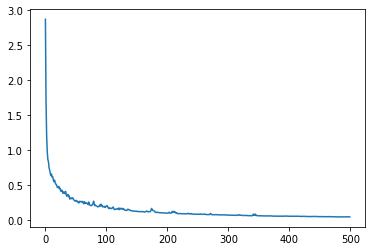

In [22]:
plt.plot(l)
plt.show()

# 6. Getting Accuracy

In [23]:
def get_acc(x,y,model):
    y_pred = model.predict(x)
    acc = np.sum(y_pred==y)/y.shape[0]
    return acc
print("Training Accuracy: ",get_acc(x_train,y_train,my_model))

Training Accuracy:  0.9398496240601504


In [24]:
print("Testing Accuracy:",get_acc(x_test,y_test,my_model))

Testing Accuracy: 0.43609022556390975


# 7. Results Visualization

In [25]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

In [26]:
y_pred_train = my_model.predict(x_train)
cnf_matrix = confusion_matrix(y_pred_train,y_train)
print(cnf_matrix)

[[154   1   3   3   3]
 [  2  32   0   0   0]
 [  4   1 160   2   2]
 [  3   0   0 112   3]
 [  1   0   2   2  42]]


Confusion matrix, without normalization
[[154   1   3   3   3]
 [  2  32   0   0   0]
 [  4   1 160   2   2]
 [  3   0   0 112   3]
 [  1   0   2   2  42]]


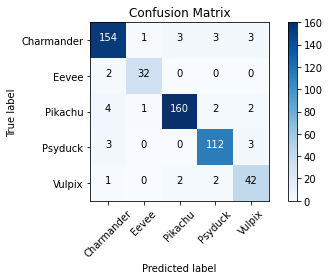

In [27]:
plot_confusion_matrix(cnf_matrix,classes=['Charmander','Eevee','Pikachu','Psyduck','Vulpix'],title="Confusion Matrix")

In [28]:
y_pred_test = my_model.predict(x_test)
cnf_matrix = confusion_matrix(y_pred_test,y_test)
print(cnf_matrix)

[[21  1  8  4  2]
 [ 1  0  3  2  4]
 [ 8  4 16  6  5]
 [ 3  2  6 19  4]
 [ 3  0  1  8  2]]


Confusion matrix, without normalization
[[21  1  8  4  2]
 [ 1  0  3  2  4]
 [ 8  4 16  6  5]
 [ 3  2  6 19  4]
 [ 3  0  1  8  2]]


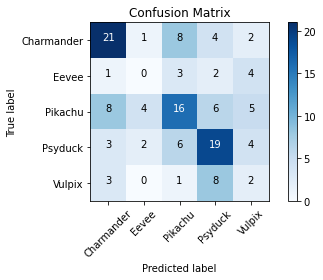

In [29]:
plot_confusion_matrix(cnf_matrix,classes=['Charmander','Eevee','Pikachu','Psyduck','Vulpix'],title="Confusion Matrix")

# 8. Visualizing the Wrong Classifications made by the Model

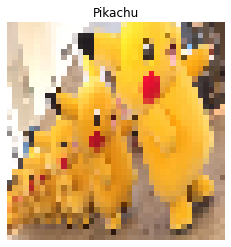

Prediction 1 Psyduck


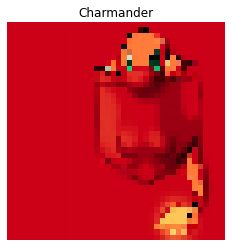

Prediction 2 Vulpix


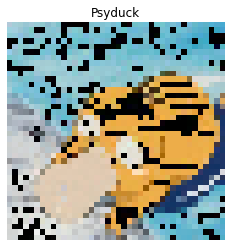

Prediction 3 Pikachu


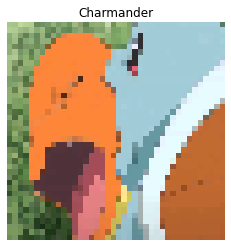

Prediction 7 Vulpix


In [30]:
for i in range(10):
    if y_test[i] != y_pred_test[i]:
        draw_image(x_test[i].reshape(40,40,3),y_test[i])
        print("Prediction %d %s"%(i,label_to_poke[y_pred_test[i]]))